In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
%matplotlib inline
from matplotlib import pyplot as plt

In [6]:
train = pd.read_csv('Task2_Train_Data_pro.csv', low_memory = False, delimiter =',')
pre_target = train['Pred_Target'].values
train.drop(['Buy_sesID'],axis=1,inplace = True )
train.drop(['Unnamed: 0'], axis =1, inplace = True)
#train.drop(['Pred_Target'], axis =1, inplace = True)
train.head()

,Cli_ItemID,ttl_Cli,AVG_CLI,Item_CLI,Fre_Cli_Itm,IN_Fre_Ctg,Cli_Wd,Cli_T,Dur_Sec,Cli_buy,Item_bought_P90,Fir_Cli,Las_Cli,Item_avg_pric,AVG_Pric,Pri_ctg_P90,below_ctg_avg_pric,below_ctg_P90
0,214851326.0,8.0,2.0,3.0,1.0,1.0,5.0,3.0,255.0,3.0,1.0,0.0,0.0,1046.0,1923.025449,4920.6,1.0,1.0
1,214853248.0,8.0,2.0,1.0,0.0,0.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,837.0,2061.555292,48380.5,1.0,1.0
2,214853094.0,8.0,2.0,1.0,0.0,1.0,5.0,3.0,0.0,1.0,1.0,0.0,0.0,4188.0,1923.025449,4920.6,0.0,1.0
3,214853090.0,8.0,2.0,3.0,1.0,1.0,5.0,3.0,3117.0,3.0,1.0,1.0,1.0,4188.0,1923.025449,4920.6,0.0,1.0
4,214567333.0,4.0,1.0,1.0,0.0,1.0,7.0,2.0,0.0,1.0,1.0,0.0,0.0,837.0,2061.555292,48380.5,1.0,1.0


In [7]:
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(train.values, pre_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
log_reg.score(train, pre_target)

0.54079172094776917

In [12]:
probs = log_reg.predict_proba(train)
#print (min(probs[:,0]))
#print (max(probs[:,0]))
y_pred = probs[:,0]
roc_auc_score(pre_target,y_pred)

0.61187749261447633

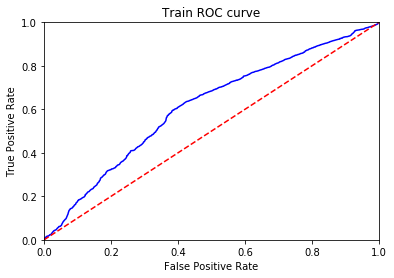

In [10]:

fpr, tpr, threshold = roc_curve(pre_target, y_pred)
df = pd.DataFrame(dict(fpr = fpr, tpr =tpr))
roc_auc = metrics.auc(fpr,tpr)

plt.title('Train ROC curve')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Validation

In [60]:
Valid = pd.read_csv('Task2_Validation_Data_pro.csv', low_memory = False, delimiter =',')
Valid.drop(['Buy_sesID'], axis =1, inplace = True)
Valid.drop(['Unnamed: 0'], axis =1, inplace = True)
Valid.head()

,Cli_ItemID,ttl_Cli,AVG_CLI,Item_CLI,Fre_Cli_Itm,IN_Fre_Ctg,Cli_Wd,Cli_T,Dur_Sec,Cli_buy,Item_bought_P90,Fir_Cli,Las_Cli,Item_avg_pric,AVG_Pric,Pri_ctg_P90,Pred_Target,below_ctg_avg_pric,below_ctg_P90
0,214854358.0,5.0,2.5,2.0,0.0,1.0,4.0,3.0,149.0,3.0,1.0,1.0,1.0,1360.0,1923.025449,4920.6,0.0,1.0,1.0
1,214859126.0,5.0,2.5,3.0,1.0,1.0,4.0,3.0,946.0,3.0,1.0,1.0,1.0,1570.0,1923.025449,4920.6,1.0,1.0,1.0
2,214712244.0,3.0,1.0,1.0,0.0,1.0,3.0,4.0,0.0,1.0,1.0,1.0,1.0,947.0,2061.555292,48380.5,1.0,1.0,1.0
3,214676480.0,3.0,1.0,1.0,0.0,1.0,3.0,4.0,0.0,1.0,1.0,1.0,1.0,5538.0,2061.555292,48380.5,0.0,0.0,1.0
4,214690839.0,3.0,1.0,1.0,0.0,1.0,3.0,4.0,0.0,1.0,0.0,0.0,0.0,686.0,2061.555292,48380.5,0.0,1.0,1.0


In [61]:
log_reg.score(Valid,Valid ['Pred_Target'].values)

0.53613744075829384

In [63]:
probs_V = log_reg.predict_proba(Valid)
y_pred_V = probs_V[:,0]
y_true_V = Valid['Pred_Target'].values
roc_auc_score(y_true_V,y_pred_V)

0.62838140130399744

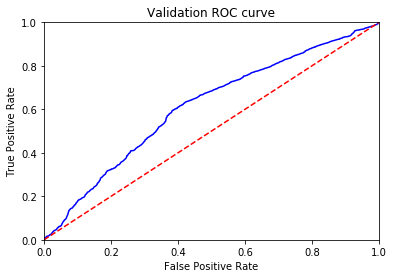

In [64]:
fpr, tpr, threshold = roc_curve(y_true, y_pred)
df = pd.DataFrame(dict(fpr = fpr, tpr =tpr))
roc_auc = metrics.auc(fpr,tpr)

plt.title('Validation ROC curve')
plt.plot(fpr,tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()